#1. Load all packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Virus_species = pd.read_csv("/content/drive/My Drive/Colab Notebooks/WBE_sequencing/Summarized_taxonomy/Virus_species/All_Virus_species.csv")
QC_summary = pd.read_csv("/content/drive/My Drive/Colab Notebooks/WBE_sequencing/Summarized_taxonomy/Total_tax/QC_summary_reads.csv")

In [ ]:
Virus_species["Samples"]=Virus_species.apply(lambda row: '_'.join(map(str, [row['method'], row['date'], row['replicate']])), axis=1)
Virus_species.head()

,taxID,date,method,Name,replicate,count,Samples
0,38018,419,IP,Bacteriophage sp.,1,1856.0,IP_419_1
1,38018,419,IP,Bacteriophage sp.,2,2038.0,IP_419_2
2,38018,419,IP,Bacteriophage sp.,3,673.0,IP_419_3
3,38018,419,PMG,Bacteriophage sp.,1,3590.0,PMG_419_1
4,38018,419,PMG,Bacteriophage sp.,2,1759.0,PMG_419_2


In [ ]:
merged = Virus_species.merge(QC_summary, on="Samples")
# Calculate the ratio by dividing "count" by "Viruses"
merged["Virus_species_ratio"] = merged["count"] / merged["Viruses"] * 100
# Calculate the virus species ratio in total after_deduped_seq
merged["Virus_total_ratio"]=merged["count"] / merged["after_deduped_seq"] * 100
merged.to_csv("/content/drive/My Drive/Colab Notebooks/WBE_sequencing/Summarized_taxonomy/Virus_species/All_Virus_species_ratio.csv")
merged.head()

,taxID,date,method,Name,replicate,count,Samples,raw_seqs,after_QC_reads,after_deduped_seq,unclassified_seq,Bacteria,Viruses,QC_trimmed_seqs,deduped_seqs,Other_classified,Virus_species_ratio,Virus_total_ratio
0,38018,419,IP,Bacteriophage sp.,1,1856.0,IP_419_1,15802752.0,15566394.0,2589177.0,163187.0,1468831.0,30940.0,236358.0,12977217.0,926219.0,5.998707,0.071683
1,278008,419,IP,uncultured phage,1,9.0,IP_419_1,15802752.0,15566394.0,2589177.0,163187.0,1468831.0,30940.0,236358.0,12977217.0,926219.0,0.029089,0.000348
2,526394,419,IP,Aeromonas phage DH1,1,20.0,IP_419_1,15802752.0,15566394.0,2589177.0,163187.0,1468831.0,30940.0,236358.0,12977217.0,926219.0,0.064641,0.000772
3,1424632,419,IP,Bufivirus UC1,1,25.0,IP_419_1,15802752.0,15566394.0,2589177.0,163187.0,1468831.0,30940.0,236358.0,12977217.0,926219.0,0.080802,0.000966
4,1424634,419,IP,Laverivirus UC1,1,21.0,IP_419_1,15802752.0,15566394.0,2589177.0,163187.0,1468831.0,30940.0,236358.0,12977217.0,926219.0,0.067873,0.000811


In [ ]:
Distance = merged[["method","date","replicate","Name","Virus_total_ratio"]]
Distance = Distance.rename(columns={"Name":"Virus_species","Virus_total_ratio":"Virus species % in total unique reads"})
Distance['Samples'] = Distance['method'] + '_' + Distance['date'].astype(str) + '_' + Distance['replicate'].astype(str)
dst= Distance.pivot_table(index='Samples', columns='Virus_species', values='Virus species % in total unique reads', fill_value=0)
dst = dst.fillna(0)

Distance2=merged[["method","date","replicate","Name","Virus_species_ratio"]]
Distance2 = Distance2.rename(columns={"Name":"Virus_species","Virus_species_ratio":"Virus species % in total Virus"})
Distance2['Samples'] = Distance2['method'] + '_' + Distance2['date'].astype(str) + '_' + Distance2['replicate'].astype(str)
dst2= Distance2.pivot_table(index='Samples', columns='Virus_species', values='Virus species % in total Virus', fill_value=0)
dst2 = dst2.fillna(0)
dst2.head(10)

Virus_species,ASFV-like virus WU,Abidjanvirus ZC01,Acanthamoeba castellanii medusavirus,Acidovorax phage ACF1,Acinetobacter phage AIIMS-AbE5-RC,Acinetobacter phage AJO2,Acinetobacter phage Aristophanes,Acinetobacter phage Barton,Acinetobacter phage Bphi-R1888,Acinetobacter phage Effie,...,uncultured human fecal virus,uncultured phage,uncultured virus,virus sp. ctJpG3,virus sp. ctL1g6,virus sp. ctLpa4,virus sp. ctML55,virus sp. ctReX5,virus sp. ctU8j8,virus sp. ctx9V1
Samples,,,,,,,,,,,,,,,,,,,,,
IP_301_1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.048201,0.000000,0.008034,...,0.179751,0.123516,0.089374,0.011046,0.0,0.000000,0.000000,0.0,0.0,0.015063
IP_301_2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.069823,0.000000,0.019145,...,0.224109,0.184693,0.129510,0.014640,0.0,0.006757,0.000000,0.0,0.0,0.020271
IP_301_3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.079347,0.006434,0.013939,...,0.164056,0.120093,0.134032,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.018228
IP_419_1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.213316,0.000000,0.000000,...,0.342599,0.029089,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
IP_419_2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.137074,0.000000,0.000000,...,0.233971,0.000000,0.016543,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
IP_419_3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.086592,0.000000,0.000000,...,0.249385,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
IP_426_1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.074065,0.000000,0.019491,...,0.208553,0.037033,0.054575,0.000000,0.0,0.000000,0.017542,0.0,0.0,0.056524
IP_426_2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090620,0.000000,0.011533,...,0.202659,0.011533,0.029657,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.023067
IP_426_3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.048770,0.000000,0.000000,...,0.223897,0.000000,0.022168,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from scipy.spatial.distance import pdist,squareform

In [ ]:
distance_matrix2 = squareform(pdist(dst2, 'braycurtis'))
# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components2 = pca.fit_transform(distance_matrix2)
explained_variance_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
# Eigenvectors (components)
eigenvectors = pca.components_
print("Shape of Eigenvectors matrix:", eigenvectors.shape)
principal_components2

[0.7868906  0.08889841]
Shape of Eigenvectors matrix: (2, 36)


array([[ 1.46964363,  0.52226628],
       [ 1.25033283,  0.64839781],
       [ 1.44447001,  0.6116193 ],
       [ 1.79264259, -0.29242844],
       [ 1.70725965, -0.30164624],
       [ 1.97680116, -0.35995164],
       [ 1.59164629, -0.07829333],
       [ 1.85661293, -0.14084597],
       [ 1.81727716, -0.12520061],
       [-1.16001788,  0.2726751 ],
       [-0.99659424,  0.54850157],
       [-1.12555632,  0.43876509],
       [-1.06717139, -0.25861384],
       [-1.08774467, -0.25423883],
       [-1.04157498, -0.23524108],
       [-1.07259111, -0.33230051],
       [-1.05467762, -0.32395296],
       [-1.05241926, -0.32786506],
       [-0.49152194,  0.81226786],
       [-0.31152747,  0.85290362],
       [-0.33040858,  0.85321534],
       [ 0.94800824, -0.24430916],
       [ 1.16898088, -0.27508065],
       [ 1.14116267, -0.26257926],
       [ 0.93336638, -0.12336134],
       [ 1.0795784 , -0.13981819],
       [ 0.84095684, -0.07273456],
       [-1.27411639,  0.25141554],
       [-1.04944428,

In [ ]:
distance_matrix = squareform(pdist(dst, 'braycurtis'))
# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(distance_matrix)
explained_variance_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
# Eigenvectors (components)
eigenvectors = pca.components_
print("Shape of Eigenvectors matrix:", eigenvectors.shape)
principal_components

[0.64122105 0.20460615]
Shape of Eigenvectors matrix: (2, 36)


array([[-1.43918142, -0.43844986],
       [-1.38686223, -0.23970107],
       [-1.4068102 , -0.44268971],
       [-1.25241082, -0.70667479],
       [-1.25412311, -0.75057213],
       [-1.28438207, -0.98833379],
       [-1.43271886, -0.47780197],
       [-1.39564516, -0.76913783],
       [-1.42657985, -0.69887277],
       [ 0.65520271,  0.68912531],
       [ 1.09884503,  0.18287534],
       [ 1.07266998,  0.24646671],
       [ 0.21384834,  1.09643655],
       [ 0.20014635,  1.10519733],
       [ 0.46925517,  0.85326205],
       [ 0.20787842,  1.16372502],
       [ 0.12475304,  1.17549322],
       [ 0.07874897,  1.16575186],
       [-0.48207333,  0.82208515],
       [-0.60406251,  0.73419599],
       [-0.59289238,  0.74914629],
       [-1.11324888,  0.1675449 ],
       [-0.89291145, -0.04421137],
       [-1.1723744 , -0.00948003],
       [-1.18176203,  0.21198496],
       [ 0.5672953 , -0.50791181],
       [-0.97288743,  0.29834482],
       [ 1.6347643 , -0.54737161],
       [ 1.53069166,

In [ ]:
sample = dst.index
sample_df = pd.DataFrame({'Samples': sample})
principal_all = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])
final = pd.concat([principal_all, sample_df], axis = 1)
final[['method', 'date', 'replicate']] = final['Samples'].str.split('_', expand=True)

In [ ]:
sample = dst.index
sample_df = pd.DataFrame({'Samples': sample})
principal_all2 = pd.DataFrame(data = principal_components2
             , columns = ['principal component 1', 'principal component 2'])
final2 = pd.concat([principal_all2, sample_df], axis = 1)
final2[['method', 'date', 'replicate']] = final2['Samples'].str.split('_', expand=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import chi2
from matplotlib.patches import Ellipse

<ipython-input-41-747c27da3340>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Set1')
<ipython-input-41-747c27da3340>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=color, edgecolor=None, marker=marker, s=60,


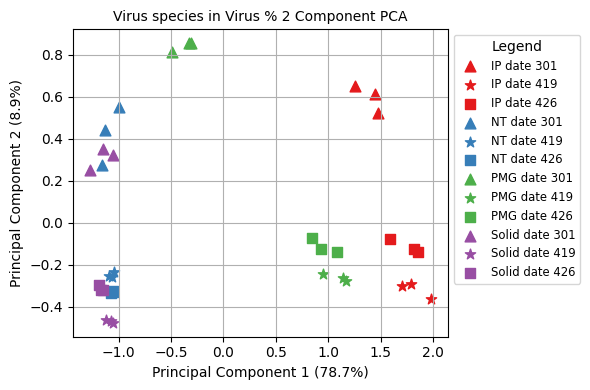

In [ ]:
# Get unique values for method and date
methods = final2['method'].unique()
dates = final2['date'].unique()

# Set up the figure's features
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Principal Component 1 (78.7%)', fontsize=10)
ax.set_ylabel('Principal Component 2 (8.9%)', fontsize=10)
ax.set_title('Virus species in Virus % 2 Component PCA', fontsize=10)

# Define marker shapes and colormap
marker_shapes = ["^", "*", "s", "o"]  # Add more marker shapes if needed
colormap = cm.get_cmap('Set1')

for i, method in enumerate(methods):
    for j, date in enumerate(dates):
        index = (final2['method'] == method) & (final2['date'] == date)
        x = final2.loc[index, 'principal component 1']
        y = final2.loc[index, 'principal component 2']
        if len(x) > 0 and len(y) > 0:
            color = colormap(i)  # Use normalized index for colormap
            marker = marker_shapes[j]
            ax.scatter(x, y, c=color, edgecolor=None, marker=marker, s=60,
                       label=f'{method} date {date}')

# Set legend outside the plot with smaller font size
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title='Legend')
ax.grid()
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/WBE_sequencing/Final_results/Virus_species_Virus_BC_PCA.png')
plt.show()